This is a python-data analysis notebook which records some important codes.

In [15]:
import numpy as np 
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

2020/10/26:数据分组与聚合运算

In [16]:
tips=pd.read_csv('tips.csv')

In [17]:
tips.groupby('sex')['tip']
# groupby方法生成了一个groupby对象，是可迭代类型(name,group)

In [18]:
tips.groupby('sex').mean()
# count,sum,mean,median,std,var,min,max,prod,first,last

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [19]:
def get_range(x):
    return x.max()-x.min()
tips_range=tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Female    5.5
Male      9.0
Name: tip, dtype: float64

In [20]:
# numpy库中的argsort()函数：
arr=np.array([1,3,8,4,32,6,7])
arr_index=np.argsort(arr)
arr[arr_index]

array([ 1,  3,  4,  6,  7,  8, 32])

2020/10/27:分组运算与数据透视表

In [21]:
# transform方法
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
         ...   
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, dtype: float64

In [22]:
# apply方法
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2

In [23]:
# pivot_table函数,默认调用函数为mean()
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,No,Yes,All
sex,,,
Female,149.77,96.74,246.51
Male,302.00,183.07,485.07
All,451.77,279.81,731.58


In [24]:
# 交叉表：分组计算频率
cross_table=pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [25]:
cross_table.div(cross_table.sum(1),axis=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


2020/11/08:matplotlib可视化

In [29]:
data={
    'name':['张三','李四','王五','小明'],
    'sex':['female','female','male','male'],
    'math':[78,79,83,92],
    'city':['北京','上海','广州','北京']
}
df=pd.DataFrame(data)

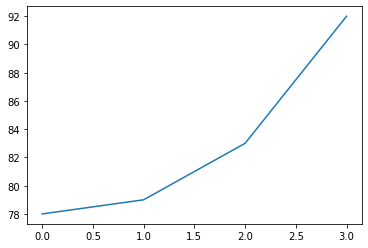

In [31]:
# 线型图
plt.plot(df.index,df['math'])

<BarContainer object of 5 artists>

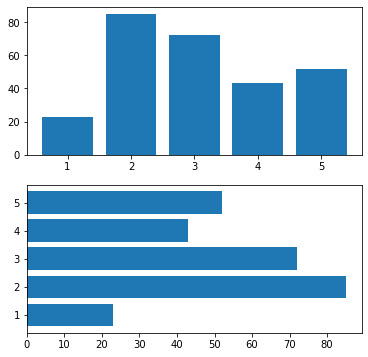

In [40]:
# 柱状图
fig,axes=plt.subplots(2,1,figsize=(6,6))
data=[23,85,72,43,52]
axes[0].bar([1,2,3,4,5],data)
axes[1].barh([1,2,3,4,5],data)

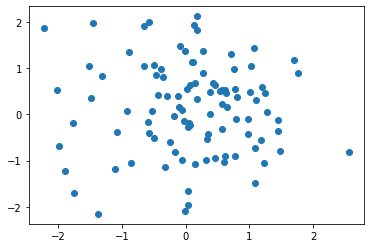

In [41]:
# 散点图
X=np.random.randn(100)
Y=np.random.randn(100)
plt.scatter(X,Y)

(array([1., 0., 2., 2., 0., 4., 2., 5., 2., 1., 3., 8., 5., 6., 6., 5., 7.,
        4., 6., 6., 5., 6., 7., 3., 1., 1., 0., 0., 1., 1.]),
 array([-2.89030037, -2.70424747, -2.51819457, -2.33214167, -2.14608877,
        -1.96003587, -1.77398297, -1.58793008, -1.40187718, -1.21582428,
        -1.02977138, -0.84371848, -0.65766558, -0.47161268, -0.28555978,
        -0.09950689,  0.08654601,  0.27259891,  0.45865181,  0.64470471,
         0.83075761,  1.01681051,  1.20286341,  1.3889163 ,  1.5749692 ,
         1.7610221 ,  1.947075  ,  2.1331279 ,  2.3191808 ,  2.5052337 ,
         2.6912866 ]),
 <a list of 30 Patch objects>)

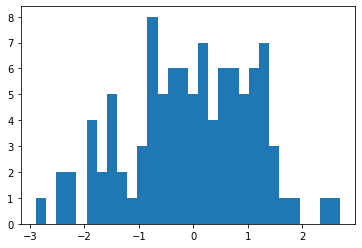

In [42]:
# 直方图
x=np.random.normal(size=100)
plt.hist(x,bins=30)

2020/11/15:最小二乘法

In [12]:
def linear_regression(x, y):  
    N = len(x) 
    sumx = sum(x) 
    sumy = sum(y) 
    sumx2 = sum(x**2) 
    sumxy = sum(x*y) 

    A = np.mat([[N, sumx], [sumx, sumx2]]) 
    b = np.array([sumy, sumxy]) 

    return np.linalg.solve(A, b)
# a0, a1 = linear_regression(x,y)
# y = a0 + a1*x